In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [68]:
df=pd.read_csv('dulieuxettuyendaihoc.csv')

In [69]:
df=df[['T5','T6','GT','DT','KV','KT','NGONNGU','TOANLOGICPHANTICH', 'GIAIQUYETVANDE','NGAYTHI','DINHHUONGNGHENGHIEP']]

In [70]:
df.rename(columns={'TOANLOGICPHANTICH':'LOGIC','GIAIQUYETVANDE':'UNGXU','DINHHUONGNGHENGHIEP':'DINHHUONG'},inplace=True)

In [71]:
df

,T5,T6,GT,DT,KV,KT,NGONNGU,LOGIC,UNGXU,NGAYTHI,DINHHUONG
0,7.4,6.9,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,3.0,4.0,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,4.8,5.7,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,6.1,7.4,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,6.8,8.0,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...
95,7.9,6.6,F,NaN,1,C,5.25,1.50,6.25,7/20/2022,Yes
96,5.5,5.7,F,NaN,1,C,5.25,3.75,4.75,7/20/2022,No
97,9.0,8.5,M,NaN,2NT,C,7.00,8.00,4.00,7/20/2022,Yes
98,4.1,4.3,M,NaN,1,C,5.00,3.50,5.50,7/20/2022,No


In [ ]:
#truong iuh can tuyen uu tien ngongnu tot và logic vừa vuawaf .
#vấn đề : thế nào là tốt, thế nào là vừa vừa,kha khá


In [6]:
#giải thuật gom cụm clusteasing
#đay là giải thuật có input đau vào nhung không có sẵn output đầu ra trong tập dl 
#do đó ta gọi là nhóm kỹ thuật un_supervised (học không giám sát)
#để giải quyết nhóm kĩ thuật này ta cần các yếu tố sau:
#1 dl đầu vào
#2 có metrics (độ đo)để xác định các phần tử thuộc về đâu
#3 cần cung cấp trước số lượng cụm(k) được tạo ra

#hệ quả:
#1các phần tử thuộc cùng một cụm thì có mức độ gần gũi theo độ đo tạo ra hơn so với phần tử ở cụm khác
#2 mỗi cụm sẽ có một cụm đại diện được gọi là trung tâm

# -> trong các giải thuật về dạng toán này , người ta thường dụng độ đo  eculite thân thiết để đo  lượng mức độ gần nhau của các phần tử 
# đây là giải thuật k_mean


In [ ]:
#input baitoan trên (nn,logic), cần dùng metrics
#dùng độ đo owwclit(hay còn gọi là khoảng cách)


In [72]:
data=df[['NGONNGU','LOGIC']]

In [82]:
data.head(5)

,NGONNGU,LOGIC
0,3.25,3.25
1,6.00,4.00
2,5.00,6.75
3,4.25,4.25
4,4.25,4.50


In [83]:
from sklearn.cluster import KMeans

In [84]:
Kmeans=KMeans(n_clusters=4).fit(data)

In [92]:
print(Kmeans.cluster_centers_)# hiển thị 4 nhóm trung tâm
print(Kmeans.inertia_) # độ liên kết trung bình
print(Kmeans.n_iter_)# độ lặp 
print(Kmeans.labels_[:]) #cái nào thuộc cụm nào


[[3.71621622 4.39864865]
 [2.11290323 4.30645161]
 [5.06521739 3.23913043]
 [6.05555556 6.08333333]]
86.70542983376083
8
[0 2 3 0 0 1 3 0 0 0 0 3 1 1 0 2 0 0 0 0 1 0 2 3 2 2 2 3 0 1 2 0 0 1 1 1 2
 1 1 1 2 0 2 1 0 1 2 3 2 0 1 1 0 1 2 0 3 1 1 0 1 0 2 1 0 1 0 0 0 1 1 0 1 1
 2 2 0 0 0 1 2 1 0 1 3 0 1 1 0 1 2 0 0 0 2 2 2 3 2 2]


In [ ]:
#có bao nhiêu dong dl thì có thể chi bấy nhiêu cụm, ít nhất là sẽ có một cụm

In [79]:
import math

In [81]:
kc=math.sqrt((3.25 - 6)*(3.25 - 6) + (3.25-4)*(3.25 - 4))
kc

2.850438562747845

In [ ]:
#bai khác


In [128]:
Kmeans=KMeans(n_clusters=6).fit(data)

In [129]:
print(Kmeans.cluster_centers_)# hiển thị 4 nhóm trung tâm
print(Kmeans.inertia_) # độ liên kết trung bình
print(Kmeans.n_iter_)# độ lặp 
print(Kmeans.labels_[:]) #cái nào thuộc cụm nào


[[5.14285714 2.25      ]
 [3.82407407 4.67592593]
 [2.76136364 3.54545455]
 [6.10714286 6.46428571]
 [5.15277778 3.83333333]
 [2.02631579 4.80263158]]
59.06233702944229
6
[2 4 3 1 1 5 3 1 2 1 2 3 5 2 1 2 1 1 1 1 5 2 4 3 0 0 4 4 1 2 4 1 1 2 5 5 4
 5 2 2 4 1 4 2 1 5 0 3 4 1 5 2 2 5 4 1 3 5 5 2 2 2 0 2 4 2 1 1 1 2 5 1 5 5
 4 4 2 2 1 2 4 5 1 5 4 1 5 5 1 5 4 1 1 1 0 0 4 3 4 0]


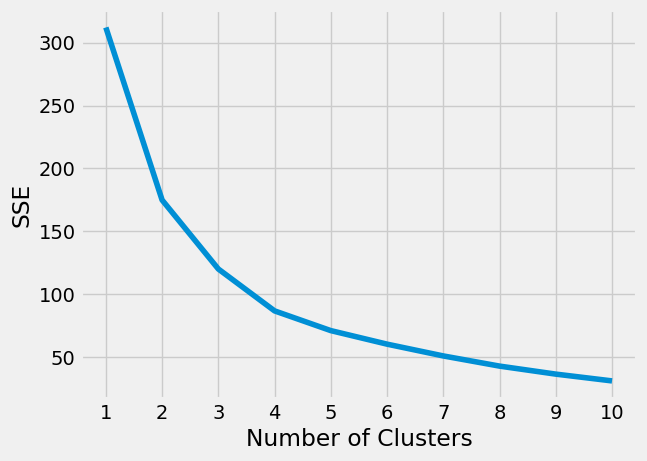

In [131]:
kmeans_kwargs={'init':'random','n_init':10,'max_iter':300,'random_state':42}
sse=[]
for k in range (1,11):
    kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.style.use('fivethirtyeight')
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()



In [148]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [154]:
pip install upgrade kneed

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [171]:
from kneed import  KneeLocator


In [176]:
#cách hai dung pp eblow

kl=KneeLocator(range(1,11),sse,curve='convex',direction='decreasing')
print(kl.elbow)


4


In [138]:
#xay dung ung dụng
kmeans=KMeans(n_clusters=4).fit(data)
data['Cluster']=kmeans.labels_[:]
print(data[['NGONNGU','LOGIC','Cluster']])

    NGONNGU  LOGIC  Cluster
0      3.25   3.25        1
1      6.00   4.00        0
2      5.00   6.75        2
3      4.25   4.25        1
4      4.25   4.50        1
..      ...    ...      ...
95     5.25   1.50        0
96     5.25   3.75        0
97     7.00   8.00        2
98     5.00   3.50        0
99     5.25   2.50        0

[100 rows x 3 columns]


C:\Users\THANH DUOC\AppData\Local\Temp\ipykernel_11860\161318420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster']=kmeans.labels_[:]


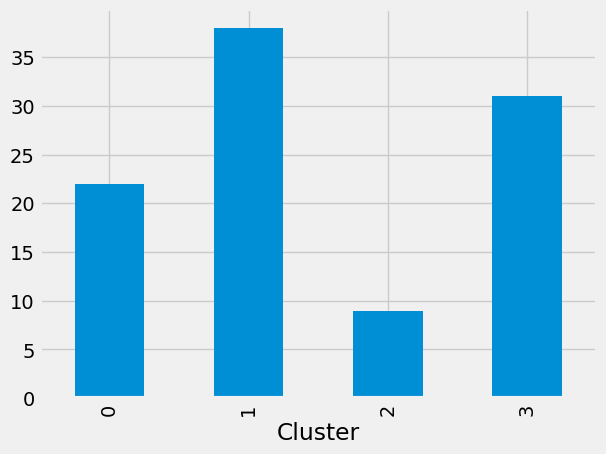

In [153]:
gr_data=data.groupby(['Cluster']).size()
gr_data.plot.bar()
plt.show()

C:\Users\THANH DUOC\AppData\Local\Temp\ipykernel_11860\1521055949.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gr_data_mean=data.groupby(['Cluster'])['NGONNGU','LOGIC'].mean()


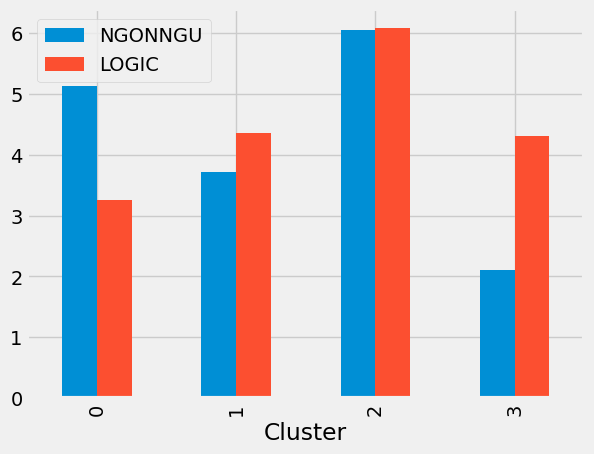

In [170]:
gr_data_mean=data.groupby(['Cluster'])['NGONNGU','LOGIC'].mean()
gr_data_mean.plot(kind='bar')
plt.show()

In [ ]:
#về nhà sinh viên khám phá các cụm cho : ngonngu logic ungxu